[CLIP: Connecting text and images](https://openai.com/research/clip)
</br>
</br>
[Model Card: CLIP](https://huggingface.co/openai/clip-vit-base-patch32)

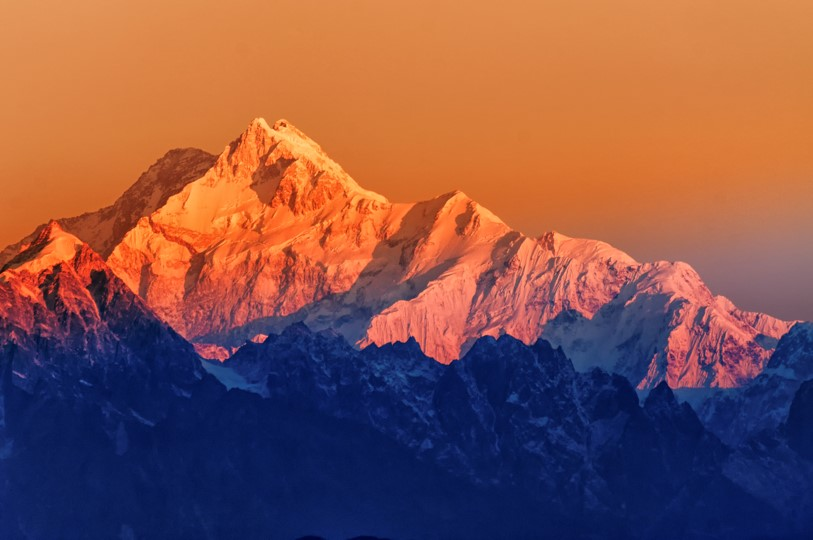

Text: a photo of a mountain, Probability: 0.9984664916992188
Text: a photo of a beach, Probability: 0.001533549278974533


In [51]:
from PIL import Image
import os
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
text = ["a photo of a mountain", "a photo of a beach"]
image_dir = os.path.join("..", "pictures", "nature")

with Image.open(os.path.join(image_dir, "Picture33.jpg")) as im:

    inputs = processor(text=text, images=im, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    display(im)
    for (prob, text) in zip(probs[0].tolist(), text):
        print(f'Text: {text}, Probability: {prob}')


In [11]:
# one image embedding, 2 text embeddings
print(outputs.image_embeds.shape, outputs.text_embeds.shape)

torch.Size([1, 512]) torch.Size([2, 512])


In [56]:
# Text Only Sample
import itertools
import torch.nn.functional as F
from transformers import CLIPTokenizer

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

text = ["cat", "dog", "lion"]
text_inputs = tokenizer(text, padding=True, return_tensors="pt")
text_embeds = model.get_text_features(**text_inputs)
for ((text1, embedding1), (text2, embedding2)) in itertools.combinations(zip(text, text_embeds), 2):
    print(f"Comparing {text1} <-> {text2} = {F.cosine_similarity(embedding1, embedding2, dim=0)}")


Comparing cat <-> dog = 0.912206768989563
Comparing cat <-> lion = 0.828037679195404
Comparing dog <-> lion = 0.8327143788337708


Comparing Picture33.jpg <-> Picture34.jpg = 0.81035315990448
Comparing Picture33.jpg <-> Picture35.jpg = 0.7039095759391785
Comparing Picture34.jpg <-> Picture35.jpg = 0.8154768943786621
Picture33.jpg


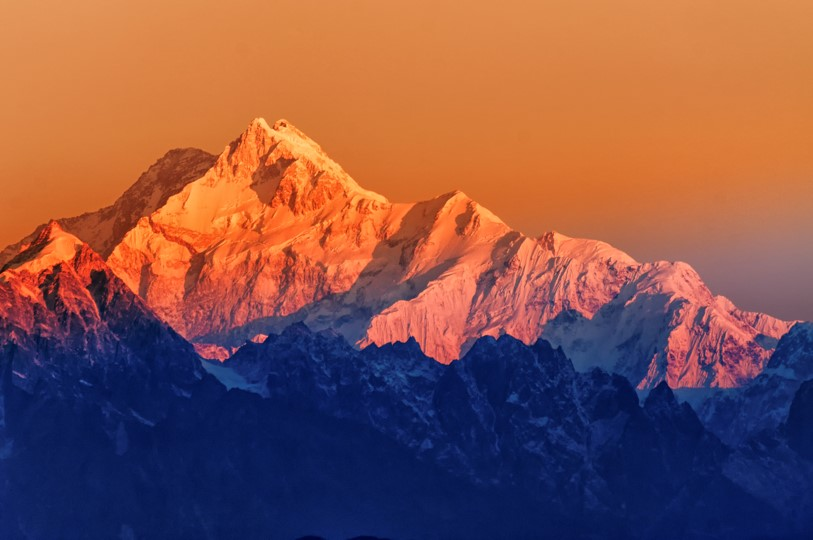

Picture34.jpg


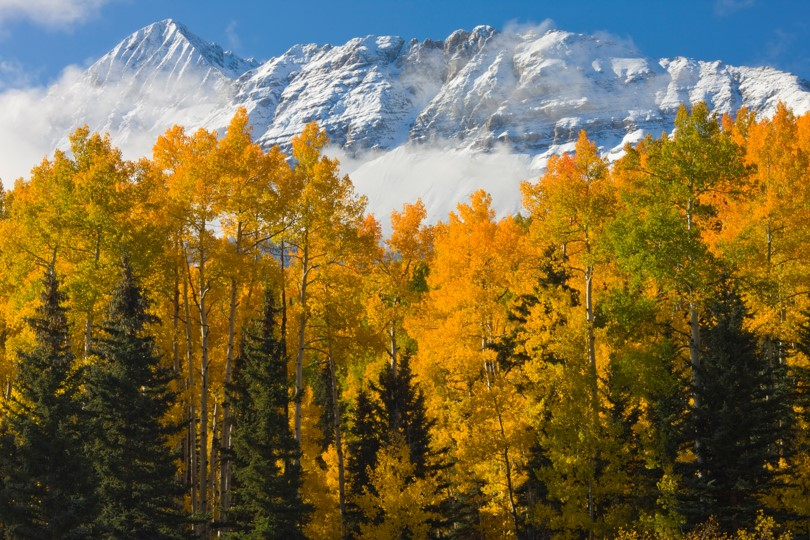

Picture35.jpg


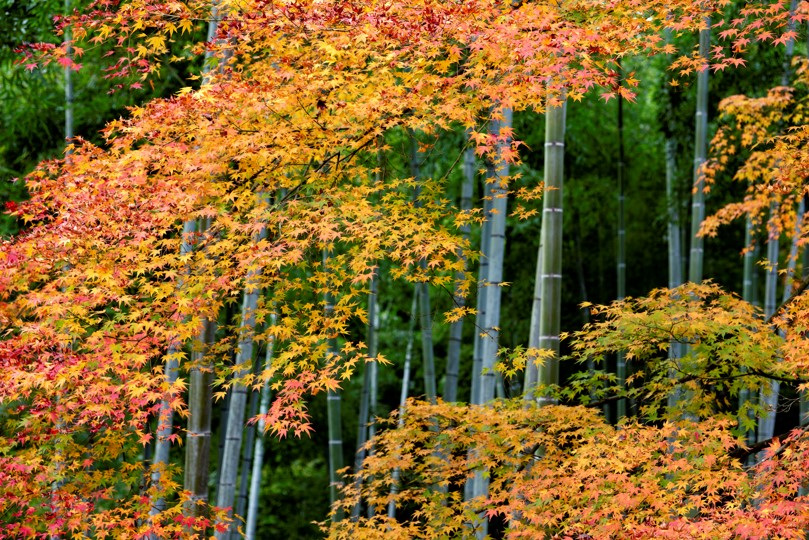

In [63]:
# Image Only Sample

with Image.open(os.path.join(image_dir, "Picture33.jpg")) as im1, Image.open(os.path.join(image_dir, "Picture34.jpg")) as im2, Image.open(os.path.join(image_dir, "Picture35.jpg")) as im3:
    images = [im1, im2, im3]
    image_inputs = processor(text=None, images=images, return_tensors="pt", padding=True)
    image_embeds = model.get_image_features(**image_inputs)
    for ((im1, embedding1), (im2, embedding2)) in itertools.combinations(zip(images, image_embeds), 2):
        print(f"Comparing {os.path.basename(im1.filename)} <-> {os.path.basename(im2.filename)} = {F.cosine_similarity(embedding1, embedding2, dim=0)}")
    
    for im in images:
        print(os.path.basename(im.filename))
        display(im)